# URL Scraper Starter Kit
## Structure of this Starter Kit

1. Source code (in Python) - library and application
2. Jupyter Notebook files (ipynb) including manuals inside
3. Example files - data with urls - url.txt

### Data processing schema
URL list in files -> URLScraper -> Websites in NoSQL collections for further processing

### Prerequisites
A data source containing the URLs to scrape is needed. It can be an iterable like a list, or a data frame column containing URLs. For this starer kit, we use an input file that is line-separated and looks like this:

http://stat.gov.pl

http://destatis.de

http://www.nsi.bg

Five steps to run this application.

1. Import libraries
2. Create a connection to mongodb server
3. Set the database name
4. Set the file name of URLs to import
5. Start the web scraping

# 1. Import libraries.
If they do not exist please update your Python environment with pip, pip3, conda or easy_install. Look into manual.

In [1]:
# import libraries
from pymongo import MongoClient
import requests
from datetime import datetime
import string, sys
import time

# 2. Create a connection to mongodb server. 

Replace the values below with your own.

### Variables to set:

servername - change with IP address or name of the server, e.g. 192.168.1.1 or serverdb.domain.com

port - change the port number - for MongoDB default is 27017

In [2]:
host='localhost'
port=27017
# define the client connection
# host - default localhost
# port - default 27017
client=MongoClient('mongodb://'+str(host)+":"+str(port))

# 3. Set the database name.

### Variable to set:

dbname - if the database does not exist it will be created.

In [3]:
dbname='wpc'
try:
    database=client[dbname]
except:
    print('Error connecting the database', sys.exc_info()[0])

# 4. Import the file containing URLs to scrape. 
We created a line separated file containing URLs as explained in the prerequisites.

### Variable to set:

filename - the name of the file, e.g. url.txt

In [4]:
filename='url.txt'
file=open(filename,'r') 

# 5. Start the web scraping.

### Variables to set:

timeBetweenRequests - set the time between requests - in seconds (suggested 3-5 seconds).

collectionName - default database.websites - value after dot can be changed, e.g. database.myfirstcollection, database.wpc_20200301

timeOutConnect - maximum time in seconds to connect to the website

timeOutRead - maximum time in seconds to read the website

userAgent - the name of the robot (should be changed to the name of your organization and the purpose of scraping)

In [5]:
timeBetweenRequests=0
timeOutConnect=10
timeOutRead=15
userAgent='python-app/0.1 experimental for statistical purposes'
collectionName = database.websites
for url in file:
    url='http://'+url.lower().strip().replace('http://','').replace('https://','')
    print('Scraping ',url.strip())
    headers = {'user-agent': userAgent}
    try:
        website=requests.get(url.strip(), headers=headers, timeout=(timeOutConnect,timeOutRead))
        json = {
            'url': str(url.strip()),
            'content':  website.text,
            'date': str(datetime.now())
        }
        result = collectionName.insert_one(json)
        print('Scraped ',url.strip())
    except:
        print('Error scraping ',url)
    # N second delay on purpose
    time.sleep(timeBetweenRequests)

Scraping  http://www.stat.gov.pl
Error scraping  http://www.stat.gov.pl
Scraping  http://destatis.de
Scraped  http://destatis.de
Scraping  http://www.nsi.bg
Scraped  http://www.nsi.bg


# 6. Retrieve saved website data from MongoDB
This part shows how the data is saved in the NoSQL database

In [9]:
# Get the first saved website as an example
a_website = database.websites.find_one()

<!doctype html>
<html lang="de">
<head>
  <base href="https://www.destatis.de/"/>
  <meta charset="UTF-8"/>
  <title>Startseite  -  Statistisches Bundesamt</title>
  <meta name="title" content="Startseite"/>
  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.5, user-scalable=1"/>
  <meta name="generator" content="Government Site Builder"/>
  
  
  
    <meta name="keywords" content="Amtliche Statistik, Pressemitteilung, Publikation, Statistik, Statistisches Bundesamt / Deutschland, Tabelle"/>
    <meta name="description" content="Internetangebot des Statistischen Bundesamtes mit aktuellen Informationen, Publikationen, Zahlen und Fakten der amtlichen Statistik"/>

  







<meta property="og:site_name" content="Statistisches Bundesamt"/>
<meta property="og:type" content="website"/>
<meta property="og:title" content="Startseite"/>
<meta property="og:description" content="Internetangebot des Statistischen Bundesamtes mit aktuellen Informationen, Publi
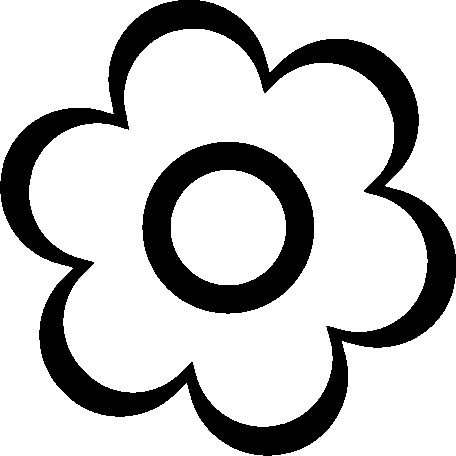

In [12]:
# Print the HTML code of the website
print(a_website['content'])